In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
df_ifr = pd.read_excel('covid_19-iss.xlsx',
                          sheet_name='sesso_eta',
                          engine = 'openpyxl')

In [44]:
df_ifr.loc[(df_ifr.DECEDUTI == '<5'), 'DECEDUTI'] = 4 #Replace <5 with 4
df_ifr = df_ifr.loc[(df_ifr.AGE_GROUP != 'Non noto') & (df_ifr.SESSO != 'Non noto')]
df_ifr['DECEDUTI'] = pd.to_numeric(df_ifr['DECEDUTI'])
df_ifr['CASI_CUMULATIVI'] = pd.to_numeric(df_ifr['CASI_CUMULATIVI'])
df_ifr = df_ifr[['AGE_GROUP', 'DECEDUTI', 'CASI_CUMULATIVI']]
df_ifr = df_ifr.groupby('AGE_GROUP').sum()

In [45]:
df_ifr['IFR'] = df_ifr['DECEDUTI'] / df_ifr['CASI_CUMULATIVI']
df_ifr.reset_index(inplace=True)


In [47]:
df_ifr

,AGE_GROUP,DECEDUTI,CASI_CUMULATIVI,IFR
0,0-9,9,98903,0.000091
1,10-19,9,207030,0.000043
2,20-29,45,295336,0.000152
3,30-39,171,303482,0.000563
4,40-49,704,391493,0.001798
5,50-59,2758,440201,0.006265
6,60-69,7995,276920,0.028871
7,70-79,20635,207740,0.099331
8,80-89,35200,177759,0.198021
9,>90,17191,67667,0.254053


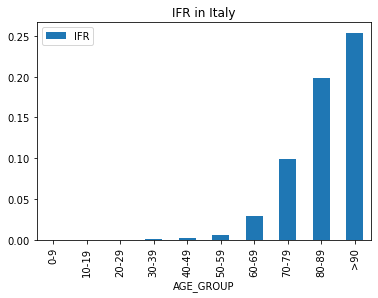

In [54]:
df_ifr.plot( x='AGE_GROUP', y='IFR', kind = 'bar', 
            title='IFR in Italy',)
plt.savefig('Presentation/Images/IFR_Italy.png')